In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

First, let's mport the test and train data sets

In [2]:
df_train = pd.read_csv('input/train.tsv',sep='\t')
df_test = pd.read_csv('input/test.tsv',sep='\t')

In [3]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


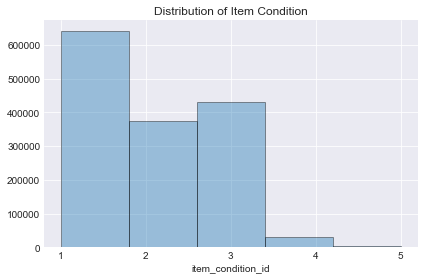

In [5]:
fig = sns.distplot(df_train['item_condition_id'],kde=False,bins=5)
fig.set_xticks(np.arange(1,6))
fig.set_title('Distribution of Item Condition')
plt.tight_layout()

In [6]:
df_train['tier_count'] = df_train['category_name'].dropna().apply(lambda x: len(x.split('/')))

In [7]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,tier_count
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,3.0
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.0
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,3.0
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.0
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.0


In [8]:
df_train.tier_count.unique()

array([  3.,  nan,   5.,   4.])

In [9]:
df_train[df_train['tier_count']>3].head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,tier_count
239,239,Zagg invisible shield for IPad air,1,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,10.0,1,Zag invisible shield for IPad air,5.0
742,742,iPad Pro Smart Cover,2,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,31.0,0,iPad Pro Smart Cover in Lilac Made for iPad Pr...,5.0
1700,1700,LIKE NEW KOBO eReader Tablet Only [rm]!!,1,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,31.0,0,Selling a tablet literally like new. No scratc...,5.0
2828,2828,Leotard,3,Sports & Outdoors/Exercise/Dance/Ballet,NaN,30.0,0,Competition Leo. only worn once for one comp. ...,4.0
2923,2923,Vuru tablet. 7 inch.,3,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,26.0,0,Vuru tablet. Perfect for children. It does hav...,5.0


In [58]:
def split_tiers(cat):
    try:
        text = cat.split('/')
        l = len(text)
        
        if l == 3:
            txt1, txt2, txt3 = text
            return txt1, txt2, txt3, np.nan, np.nan
        elif l == 4:
            txt1, txt2, txt3, txt4 = text
            return txt1, txt2, txt3, txt4, np.nan
        elif l == 5:
            txt1, txt2, txt3, txt4, txt5 = text
            return txt1, txt2, txt3, txt4, txt5
        else:
            return np.nan, np.nan, np.nan, np.nan, np.nan
    except:
        return np.nan, np.nan, np.nan, np.nan, np.nan

In [54]:
def split_tiers(cat):
    if cat:
        tiers = cat.split(sep='/')
        while len(tiers) < 5:
            tiers.append('No Label')
    else:
        tiers = ['No Label', 'No Label', 'No Label', 'No Label', 'No Label']
    
    return tiers[0], tiers[1], tiers[2], tiers[3], tiers[4]

In [60]:
df_train['tier1'], df_train['tier2'], df_train['tier3'], df_train['tier4'], df_train['tier5'] = \
zip(*df_train.category_name.apply(lambda val: split_tiers(val)))

In [61]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,tier_count,tier1,tier2,tier3,tier4,tier5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,3.0,Men,Tops,T-shirts,NaN,NaN
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.0,Electronics,Computers & Tablets,Components & Parts,NaN,NaN
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,3.0,Women,Tops & Blouses,Blouse,NaN,NaN
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.0,Home,Home Décor,Home Décor Accents,NaN,NaN
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.0,Women,Jewelry,Necklaces,NaN,NaN


In [62]:
df_train.nunique()

train_id             1482535
name                 1225273
item_condition_id          5
category_name           1287
brand_name              4809
price                    828
shipping                   2
item_description     1281426
tier_count                 3
tier1                     10
tier2                    113
tier3                    870
tier4                      6
tier5                      2
dtype: int64

In [64]:
df_train[df_train['tier4'].notnull()]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,tier_count,tier1,tier2,tier3,tier4,tier5
239,239,Zagg invisible shield for IPad air,1,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,10.0,1,Zag invisible shield for IPad air,5.0,Electronics,Computers & Tablets,iPad,Tablet,eBook Readers
742,742,iPad Pro Smart Cover,2,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,31.0,0,iPad Pro Smart Cover in Lilac Made for iPad Pr...,5.0,Electronics,Computers & Tablets,iPad,Tablet,eBook Readers
1700,1700,LIKE NEW KOBO eReader Tablet Only [rm]!!,1,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,31.0,0,Selling a tablet literally like new. No scratc...,5.0,Electronics,Computers & Tablets,iPad,Tablet,eBook Readers
2828,2828,Leotard,3,Sports & Outdoors/Exercise/Dance/Ballet,NaN,30.0,0,Competition Leo. only worn once for one comp. ...,4.0,Sports & Outdoors,Exercise,Dance,Ballet,NaN
2923,2923,Vuru tablet. 7 inch.,3,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,26.0,0,Vuru tablet. Perfect for children. It does hav...,5.0,Electronics,Computers & Tablets,iPad,Tablet,eBook Readers
3394,3394,iPod 1st generation 80gb,5,Electronics/Computers & Tablets/iPad/Tablet/eB...,Apple,20.0,1,For parts or repair,5.0,Electronics,Computers & Tablets,iPad,Tablet,eBook Access
3816,3816,30oz Yeti Rambler Cooler Tumbler Cup Mug,1,Sports & Outdoors/Outdoors/Indoor/Outdoor Games,Yeti,22.0,1,The double-wall vacuum insulation keeps your b...,4.0,Sports & Outdoors,Outdoors,Indoor,Outdoor Games,NaN
3880,3880,iPad 6/iPad Air 2 Kid's Tablet case,1,Electronics/Computers & Tablets/iPad/Tablet/eB...,NaN,12.0,1,Keep the kid's busy during the summer Fits iPa...,5.0,Electronics,Computers & Tablets,iPad,Tablet,eBook Access
4159,4159,iPod Touch,4,Electronics/Computers & Tablets/iPad/Tablet/eB...,Apple,19.0,0,1st Gen iPod Touch Everything works No scratch...,5.0,Electronics,Computers & Tablets,iPad,Tablet,eBook Readers
4287,4287,Apple Wireless Keyboard,2,Electronics/Computers & Tablets/iPad/Tablet/eB...,Apple,26.0,0,Apple Wireless Keyboard. Used twice. Includes ...,5.0,Electronics,Computers & Tablets,iPad,Tablet,eBook Access
